# Image Processing in Python
Angus Galloway, 01/02/2018

In [1]:
import os
import numpy as np
import scipy.fftpack as fp
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [2]:
# Functions to go from image to frequency-image and back
im2freq = lambda data: fp.rfft(fp.rfft(data, axis=0), axis=1)
freq2im = lambda f: fp.irfft(fp.irfft(f, axis=1), axis=0)

In [3]:
IMG = 'n01515078_1185.JPEG'
PATH = './bird_img'

In [4]:
#plt.close('all')
#fig, axes = plt.subplots(nrows=1, ncols=1)
#axes.get_xaxis().set_visible(False)
#axes.get_yaxis().set_visible(False)
#axes[1].get_xaxis().set_visible(False)
#axes[1].get_yaxis().set_visible(False)
data = plt.imread(os.path.join(PATH, IMG))

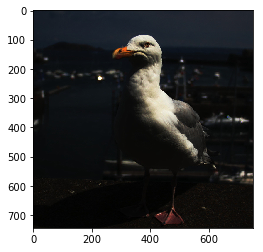

In [89]:
plt.imshow(data)

In [8]:
data.shape
h = data.shape[0]
w = data.shape[1]

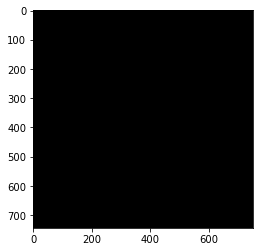

In [114]:
mask = np.ones_like(data)
mask.shape
plt.imshow(mask[:,:,0], cmap='gray')

In [46]:
'''
You must use integers when indexing matrices or arrays, 
hopefully this is obvious. Double slash '//' in Python 3
requests that integer division be performed.
'''
print(h / 5)
print(int(h / 5)) # e.g in Python 2
print(h // 5)

148.8
148
148


In [115]:
'''
Aside: 
It's good practice to define variables for numbers you want to 
reuse and possibly change when experimenting. Otherwise, we 
call them 'magic numbers', because they magically worked 
(at one point in time), but you can't remember why. 
'''
D_QUAD = 4 

print("Mask off pixels %d to %d along vertical, and %d to %d along horizontal." % 
      ((h // D_QUAD), (h * (D_QUAD - 1) // D_QUAD), (w // D_QUAD), (w * (D_QUAD - 1) // D_QUAD)))

Mask off pixels 186 to 558 along vertical, and 187 to 562 along horizontal.


In [116]:
# First, lets mask-off a square region in the center of the image
mask[h // D_QUAD : h * (D_QUAD - 1) // D_QUAD, w // D_QUAD : w * (D_QUAD - 1) // D_QUAD, :] = 0

In [117]:
# check that the previous command did something reasonable
total_zeros = np.sum(mask == 0) # mask == 0 returns an element-wise boolean-mask, then np.sum() counts them up
total_ones = np.sum(mask == 1)
print("This mask will zero %.2f%% of the pixels in data" % (100 * total_zeros / total_ones))

This mask will zero 33.33% of the pixels in data


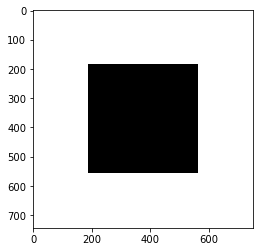

In [118]:
'''
Visualize our new mask. Only plot one channel in mask
because [0, 0, 0] or [1, 1, 1] both appear black 
in matplotlib.
'''
plt.imshow(mask[:,:,0], cmap='gray')
plt.show()

In [119]:
THIRD = 3
mask[h // THIRD : h * (THIRD - 1) // THIRD, w // THIRD: w * (THIRD - 1) // THIRD, :] = 1

In [121]:
# check that the previous command did something reasonable
total_zeros = np.sum(mask == 0)
total_ones = np.sum(mask == 1)
print("This mask will zero %.2f%% of the pixels in data" % (100 * total_zeros / total_ones))

This mask will zero 16.13% of the pixels in data


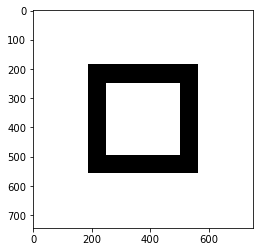

In [122]:
plt.imshow(mask[:,:,0], cmap='gray')
plt.show()

In [123]:
freq = im2freq(data)

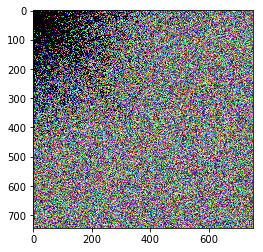

In [124]:
'''
The frequency response of natural images follows a power law decay. 
'''
plt.imshow(freq**2)

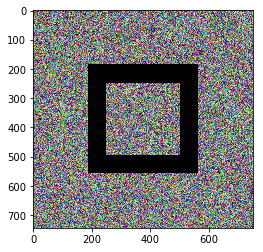

In [125]:
plt.imshow(freq * mask)

In [126]:
img = freq2im(freq)

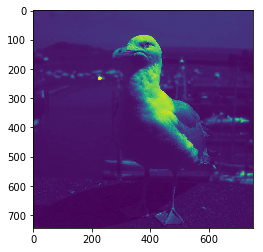

In [127]:
plt.imshow(img[:,:,2] + img[:,:,1] + img[:,:,0])

In [128]:
img_f = freq2im(freq * mask)

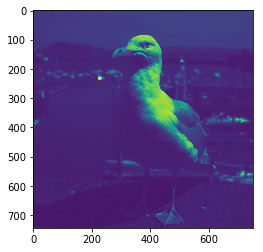

In [129]:
plt.imshow(img_f[:,:,2] + img_f[:,:,1] + img_f[:,:,0])

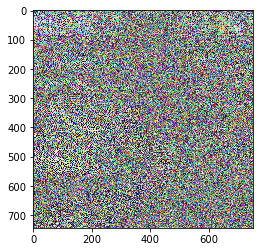

In [130]:
plt.imshow(img_f)

In [131]:
zeros = np.sum(mask == 0)
ones = np.sum(mask == 1)
zeros / ones

0.16129032258064516

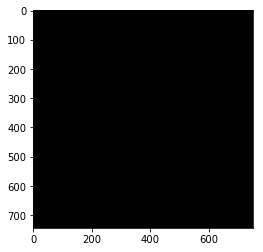

In [132]:
plt.imshow(mask)

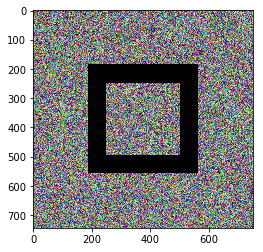

In [133]:
plt.imshow(freq*mask)